#  CREDIT CARD FRAUD ANALYSIS

## PART 3 : Anomaly Detection Methods 

### INTRODUCTION 

**Anomaly Detection**

Anomaly detection is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. It has many applications in business, from intrusion detection (identifying strange patterns in network traffic that could signal a hack) to system health monitoring (spotting a malignant tumor in an MRI scan), and from fraud detection in credit card transactions to fault detection in operating environments.


What Are Anomalies?
Anomalies can be broadly categorized as:

- Point anomalies:
A single instance of data is anomalous if it's too far off from the rest. Business use case: Detecting credit card fraud based on "amount spent."

- Contextual anomalies:
The abnormality is context specific. This type of anomaly is common in time-series data. Business use case: Spending $100 on food every day during the holiday season is normal, but may be odd otherwise.

- Collective anomalies:
A set of data instances collectively helps in detecting anomalies. Business use case: Someone is trying to copy data form a remote machine to a local host unexpectedly, an anomaly that would be flagged as a potential cyber attack.



### Anomaly Detection Techniques

**Simple Statistical Methods**


The simplest approach to identifying irregularities in data is to flag the data points that deviate from common statistical properties of a distribution, including mean, median, mode, and quantiles. Let's say the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean. Traversing mean over time-series data isn't exactly trivial, as it's not static. You would need a rolling window to compute the average across the data points. Technically, this is called a rolling average or a moving average, and it's intended to smooth short-term fluctuations and highlight long-term ones. Mathematically, an n-period simple moving average can also be defined as a "low pass filter."

**Challenges with Simple Statistical Methods**
The low pass filter allows you to identify anomalies in simple use cases, but there are certain situations where this technique won't work. Here are a few:

The data contains noise which might be similar to abnormal behavior, because the boundary between normal and abnormal behavior is often not precise.

The definition of abnormal or normal may frequently change, as malicious adversaries constantly adapt themselves. Therefore, the threshold based on moving average may not always apply.

The pattern is based on seasonality. This involves more sophisticated methods, such as decomposing the data into multiple trends in order to identify the change in seasonality.

#### Machine Learning based Approaches 


- **Density-Based Anomaly Detection**
Density-based anomaly detection is based on the k-nearest neighbors algorithm.
Assumption: Normal data points occur around a dense neighborhood and abnormalities are far away. The nearest set of data points are evaluated using a score, which could be Eucledian distance or a similar measure dependent on the type of the data (categorical or numerical). They could be broadly classified into two algorithms:

  - **K-nearest neighbor:**
k-NN is a simple, non-parametric lazy learning technique used to classify data based on similarities in distance metrics such as Eucledian, Manhattan, Minkowski, or Hamming distance.

  - **Relative density of data:**
This is better known as local outlier factor (LOF). This concept is based on a distance metric called reachability distance.


- **Clustering-Based Anomaly Detection**
Clustering is one of the most popular concepts in the domain of unsupervised learning.
Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids. K-means is a widely used clustering algorithm. It creates 'k' similar clusters of data points. Data instances that fall outside of these groups could potentially be marked as anomalies.

- **Support Vector Machine-Based Anomaly Detection**
A support vector machine is another effective technique for detecting anomalies.
A SVM is typically associated with supervised learning, but there are extensions (OneClassCVM, for instance) that can be used to identify anomalies as an unsupervised problems (in which training data are not labeled). The algorithm learns a soft boundary in order to cluster the normal data instances using the training set, and then, using the testing instance, it tunes itself to identify the abnormalities that fall outside the learned region.
Depending on the use case, the output of an anomaly detector could be numeric scalar values for filtering on domain-specific thresholds or textual labels (such as binary/multi labels).

### Problem Statement 


The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100 %
of the fraudulent transactions while minimizing the incorrect fraud classifications.

### Approaches 

- Isolation Forest Anomaly Detection Algorithm
- Density-Based Anomaly Detection (Local Outlier Factor)Algorithm
- Support Vector Machine Anomaly Detection Algorithm

### Import Libraries  

### 1. Isolation Forest 

#### REFERENCES


[1] https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

[2] https://heartbeat.fritz.ai/isolation-forest-algorithm-for-anomaly-detection-2a4abd347a5

[3] https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf

**What is the Isolation Forest**

Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.
In principle, outliers are less frequent than regular observations and are different from them in terms of values (they lie further away from the regular observations in the feature space). That is why by using such random partitioning they should be identified closer to the root of the tree (shorter average path length, i.e., the number of edges an observation must pass in the tree going from the root to the terminal node), with fewer splits necessary.

**Anomaly Score computation in Isolation forest**

As with other outlier detection methods, an anomaly score is required for decision making. In the case of Isolation Forest, it is defined as:

$$
\\s(x,n) = 2^\frac{-E(h(x)}{c(n)}
$$

where 

- $\\h(x)$ is the path length of the observation $\\x$ 

- $\\c(n)$ is average path length of unsuccessful search in a binary tree$\\x$

- $\\n$ is the number of external nodes 

also $\\c(n)$ is given as follows 

$$
\\c(n) = 2H(n-1) - (2(n-1)/n)  
$$

where $\\H(i)$ is the harmonic number and it can be estimated by $\\ln(i) + 0.5772156649 $ (Euler’s constant)


- A score close to 1 indicates anomalies
- Score much smaller than 0.5 indicates normal observations
- If all scores are close to 0.5 then the entire sample does not seem to have clearly distinct anomalies

### 2.  Local Outlier Factor 

#### REFERENCES 

[4] https://towardsdatascience.com/local-outlier-factor-lof-algorithm-for-outlier-identification-8efb887d9843

[5] https://towardsdatascience.com/local-outlier-factor-for-anomaly-detection-cc0c770d2ebe

[6] https://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf    

**What is the LOF method?**

When a point is considered as an outlier based on its local neighborhood, it is a local outlier. LOF will identify an outlier considering the density of the neighborhood. LOF performs well when the density of the data is not the same throughout the dataset.
To understand LOF, we have to learn a few concepts sequentially:

- K-distance and K-neighbors
- Reachability distance (RD)
- Local reachability density (LRD)
- Local Outlier Factor (LOF)

- **K Distance and K Neighbours**

    K-distance is the distance between the point, and it’s Kᵗʰ nearest neighbor. K-neighbors denoted by Nₖ(A) includes a set of points that lie in or on the circle of radius K-distance. K-neighbors can be more than or equal to the value of K. 
    
- **Reachability distance (RD)**

    It is defined as the maximum of K-distance of Xj and the distance between Xi and Xj. The distance measure is problem-specific (Euclidean, Manhattan, etc.)

    In layman terms, if a point Xi lies within the K-neighbors of Xj, the reachability distance will be K-distance of Xj , else reachability distance will be the distance between Xi and Xj. Thus mathematicallywe have the following: 
    
$$
RD(X_{i},X_{j}) = max(K-Distance(X_{j}), distance(X_{i},X_{j}))
$$


- **Local Reachability Density** 

    LRD is inverse of the average reachability distance of A from its neighbors. Intuitively according to LRD formula, more the average reachability distance (i.e., neighbors are far from the point), less density of points are present around a particular point. This tells how far a point is from the nearest cluster of points. Low values of LRD implies that the closest cluster is far from the point.
    
$$
LRD_K(A) = \frac{1}{\sum_{X_{j} \in N_k(A)} \frac{RD(A,X_{j})}{\lVert N_k(A) \rVert}}
$$


- **LOCAL OUTLIER FACTOR** 

    RD of each point is used to compare with the average LRD of its K neighbors. LOF is the ratio of the average LRD of the K neighbors of A to the LRD of A.
    
    Intuitively, if the point is not an outlier (inlier), the ratio of average LRD of neighbors is approximately equal to the LRD of a point (because the density of a point and its neighbors are roughly equal). In that case, LOF is nearly equal to 1. On the other hand, if the point is an outlier, the LRD of a point is less than the average LRD of neighbors. Then LOF value will be high.
    
    Generally, if LOF> 1, it is considered as an outlier, but that is not always true. Let’s say we know that we only have one outlier in the data, then we take the maximum LOF value among all the LOF values, and the point corresponding to the maximum LOF value will be considered as an outlier.
    
$$
LOF_K(A) = \frac{\sum_{X_{j} \in N_k(A)} LRD_k(X_{j}) }{\lVert N_k(A) \rVert} \times \frac{1}{ LRD_k(A)}
$$


### 3. One Class SVM 

####  REFERENCES

[7] https://towardsdatascience.com/support-vector-machine-svm-for-anomaly-detection-73a8d676c331


[8]http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/

#### RECAP of Two Class SVM 

Let us first take a look at the traditional two-class support vector machine. Consider a data set Ω={(x1,y1),(x2,y2),…,(xn,yn)}; points xi∈ℝd in a (for instance two-dimensional) space where xi is the i-th input data point and yi∈{−1,1} is the i-th output pattern, indicating the class membership.

A very nice property of SVMs is that it can create a non-linear decision boundary by projecting the data through a non-linear function ϕ to a space with a higher dimension. This means that data points which can’t be separated by a straight line in their original space I are “lifted” to a feature space F where there can be a “straight” hyperplane that separates the data points of one class from an other. 

The hyperplane is represented with the equation wTx+b=0, with w∈F and b∈R. The hyperplane that is constructed determines the margin between the classes; all the data points for the class −1 are on one side, and all the data points for class 1 on the other. The distance from the closest point from each class to the hyperplane is equal; thus the constructed hyperplane searches for the maximal margin (“separating power”) between the classes. To prevent the SVM classifier from over-fitting with noisy data (or to create a soft margin), slack variables ξi are introduced to allow some data points to lie within the margin, and the constant C>0 determines the trade-off between maximizing the margin and the number of training data points within that margin (and thus training errors). The objective function of the SVM classifier is the following minimization formulation:

$$
\begin{aligned}
\min_{w,b,\xi} \quad & \frac{1}{2}w^{t}w+C\sum_{i=1}^{N}{\xi_{i}}\\
\textrm{s.t.} \quad & y_{i}(w\phi(x_{i}+b)) \geq 1-  \xi_{i} \;  \textrm{for all i= 1,...,n} \\
  &\xi\geq0  \;  \textrm{for all i= 1,...,n}  \\
\end{aligned}
$$

### One-Class SVM according to Schölkopf

**REFERENCE**
[9] http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.675.575&rep=rep1&type=pdf

The Support Vector Method For Novelty Detection by Schölkopf et al. basically separates all the data points from the origin (in feature space F) and maximizes the distance from this hyperplane to the origin. This results in a binary function which captures regions in the input space where the probability density of the data lives. Thus the function returns +1 in a “small” region (capturing the training data points) and −1 elsewhere.

The quadratic programming minimization function is slightly different from the original stated above, but the similarity is still clear:

$$
\begin{aligned}
\min_{w,b,\xi} \quad & \frac{1}{2}w^{t}w+ \frac{1}{v\nu}\sum_{i=1}^{N}{\xi_{i} - \rho}\\
\textrm{s.t.} \quad & y_{i}(w\phi(x_{i})) \geq \rho -  \xi_{i} \;  \textrm{for all i= 1,...,n} \\
  &\xi\geq0  \;  \textrm{for all i= 1,...,n}  \\
\end{aligned}
$$

In the previous formulation the parameter C decided the smoothness. In this formula it is the parameter $\nu$ that characterizes the solution;

it sets an upper bound on the fraction of outliers (training examples regarded out-of-class) and,
it is a lower bound on the number of training examples used as Support Vector.
Due to the importance of this parameter, this approach is often referred to as $\nu$-SVM.

## CODE IMPLEMENTATION 

**REFERENCE**
[10]. https://www.kaggle.com/naveengowda16/anomaly-detection-credit-card-fraud-analysis


### Imports 

In [ ]:
#Import the required libraries
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

### Data Reads 

In [8]:
data = pd.read_csv('creditcard_data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Class Distribution 

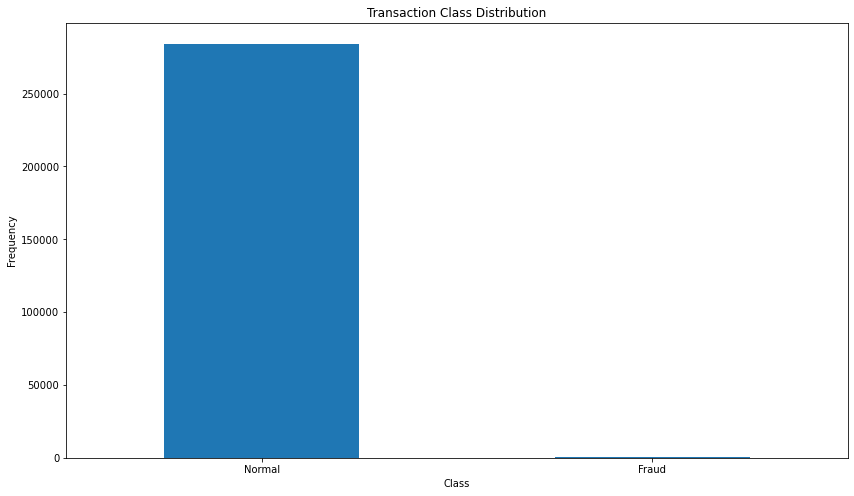

In [9]:
#Determine the number of fraud and valid transactions in the entire dataset

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [10]:
#Assigning the transaction class "0 = NORMAL  & 1 = FRAUD"
Normal = data[data['Class']==0]
Fraud = data[data['Class']==1]

In [12]:
### Print outlier fraction 

Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017304810878113635
Fraud Cases : 492
Valid Cases : 284314


**Subset data**

We choose a $ 10\%$ fraction of the orginal data set and build models 


In [13]:
data1= data.sample(frac = 0.1,random_state=1)

Fraud1 = data1[data1['Class']==1]
Valid1 = data1[data1['Class']==0]
outlier_fraction1 = len(Fraud1)/float(len(Valid1))

print(outlier_fraction1)
print("Fraud Cases : {}".format(len(Fraud1)))
print("Valid Cases : {}".format(len(Valid1)))

0.0016529506928325245
Fraud Cases : 47
Valid Cases : 28434


### MODELLING

**Prepare X, Y Data**

In [14]:
#Get all the columns from the dataframe

columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


#### Define Classifiers 

In [18]:
#Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)
                                         
   
}

In [19]:
#Fit the model

n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 69
Accuracy Score :
0.9975773322565921
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28434
           1       0.28      0.30      0.29        47

    accuracy                           1.00     28481
   macro avg       0.64      0.65      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 95
Accuracy Score :
0.9966644429619747
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28434
           1       0.02      0.02      0.02        47

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8411
Accuracy Score :
0.7046803131912504
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.71   

### OBSERVATIONS 



* Isolation Forest detected 69 errors versus Local Outlier Factor detecting 93 errors vs. SVM detecting 8411 errors

* Isolation Forest has a 99.75% more accurate than LOF of 99.67% and SVM of 70.46

* When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0

* So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.

* We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases